In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# **Load Data**

In [2]:
data = pd.read_csv('.\data\creditcard.csv')

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Check Missing Values ( If Exist ; Fill each record with mean of its feature )**

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Standardized the Input Variables**

In [6]:
data.reset_index(drop=True, inplace=True)
labels = data.pop('Class')

In [7]:
data -= data.mean()
data /= data.std()

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.137547e-15,-2.369347e-15,-9.299088e-17,6.265771e-15,1.966167e-16,1.757901e-15,-2.227124e-16,1.663279e-15,2.504277e-16,1.113356e-15,...,6.157864e-16,1.850826e-17,-2.630385e-15,-7.445328e-16,7.621335e-17,-1.055018e-15,-1.504105e-16,2.448796e-17,-3.725646e-17,2.278134e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,...,-7.069134e+01,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,...,-2.746329e-01,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,...,-8.104691e-02,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,...,1.725730e-01,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,...,5.113455e+01,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02


# Split 50% Training, 30% Test and 20% Validation 

In [9]:
data_len = len(data)
train_data = data.iloc[:data_len*50//100]
val_data = data.iloc[data_len*50//100:data_len*70//100]
test_data = data.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

# **Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).**

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
network.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [11]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [12]:

with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/10
557/557 [==============================] - 3s 4ms/step - loss: 0.3289 - acc: 0.9103 - val_loss: 0.7336 - val_acc: 0.6892
Epoch 2/10
557/557 [==============================] - 1s 1ms/step - loss: 0.0056 - acc: 0.9993 - val_loss: 0.7242 - val_acc: 0.7435
Epoch 3/10
557/557 [==============================] - 1s 1ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.5597 - val_acc: 0.7949
Epoch 4/10
557/557 [==============================] - 1s 1ms/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.6374 - val_acc: 0.7827
Epoch 5/10
557/557 [==============================] - 1s 1ms/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.6050 - val_acc: 0.7973
Epoch 6/10
557/557 [==============================] - 1s 1ms/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.5675 - val_acc: 0.8095
Epoch 7/10
557/557 [==============================] - 1s 1ms/step - loss: 0.0030 - acc: 0.9995 - val_loss: 0.4968 - val_acc: 0.8282
Epoch 8/10
557/557 [==============================] - 1s 2ms/step - loss: 0.

In [13]:
test_loss , test_acc = network.evaluate(test_data,test_labels)

2671/2671 [==============================] - 2s 691us/step - loss: 1.1604 - acc: 0.6662


In [14]:
test_labels[test_labels == 1]


199896    1
201098    1
201601    1
203324    1
203328    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 108, dtype: int64

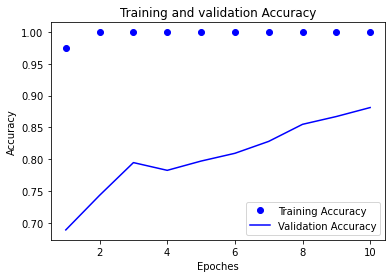

In [15]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
# plt.show()

# **Doing With RELU**

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
network1.add(layers.Dense(20,activation="relu" ))
network1.add(layers.Dense(10,activation="relu"))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL1 = network1.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
279/279 [==============================] - 2s 3ms/step - loss: 0.1762 - acc: 0.9645 - val_loss: 0.0118 - val_acc: 0.9992
Epoch 2/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0133 - val_acc: 0.9993
Epoch 3/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0124 - val_acc: 0.9993
Epoch 4/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0102 - val_acc: 0.9990
Epoch 5/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0112 - val_acc: 0.9983
Epoch 6/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0102 - val_acc: 0.9981
Epoch 7/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0117 - val_acc: 0.9976
Epoch 8/10
279/279 [==============================] - 1s 2ms/step - loss: 0.

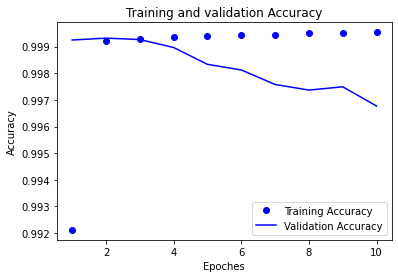

In [17]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Evaluation Step**

In [18]:
test_loss , test_acc = network1.evaluate(test_data,test_labels)

2671/2671 [==============================] - 2s 690us/step - loss: 0.0140 - acc: 0.9972


# **Predict**

In [19]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(test_labels)
print(f"{len(hit)} out of {len(predictions)} ")

85443 out of 85443 


In [20]:
y_pred = (predictions > 0.5).astype('u8')

In [21]:
print(f"Accuracy is upto {test_acc*100}%")

Accuracy is upto 99.72144961357117%


In [22]:
tf.math.confusion_matrix(
    test_labels, y_pred, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[85115,   220],
       [   18,    90]])>